# 0、图库路径及样例文件位置

In [18]:
# 图库路径
dirName = './images2'

# 一、预加载模型，及图像库

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
import keras

model=VGG19(weights='vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [19]:
# get all images files
import os
 
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        
 

# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName) 


In [20]:
len(listOfFiles)

30608

In [ ]:
from tqdm import tqdm_notebook as tqdm
img_paths = listOfFiles
img_vector_features = []
for img_path in tqdm(img_paths):
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg19_feature = model.predict(img_data)
  vgg19_feature = np.array(vgg19_feature)
  vgg19_feature = vgg19_feature.flatten()
  img_vector_features.append(vgg19_feature)

# 二、匹配样例图与图库

In [14]:
#样例图路径
query_path = "./test/path_to_rgb_image_query.jpg"

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from IPython.display import Image, display


img = image.load_img(query_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)
vgg16_feature = np.array(vgg16_feature)
query_feature = vgg16_feature.flatten()

# Numbers of similar images that we want to show
N_QUERY_RESULT = 10
nbrs = NearestNeighbors(n_neighbors=N_QUERY_RESULT, metric="cosine").fit(img_vector_features)

distances, indices = nbrs.kneighbors([query_feature])
similar_image_indices = indices.reshape(-1).tolist()

路径：./images\A动物\CA-01-241 (1).jpg
路径：./images\A动物\CA-01-206 (3).jpg
路径：./images\A动物\CA-01-241 (2).jpg


<Figure size 432x288 with 0 Axes>

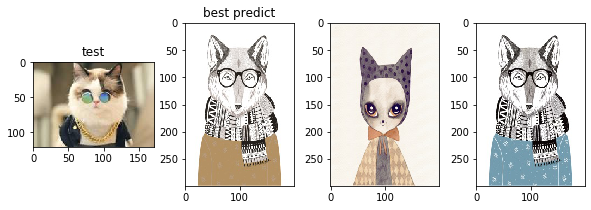

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im1 = Image.open(query_path, 'r')
pil_im2 = Image.open(img_paths[similar_image_indices[0]], 'r')
pil_im3 = Image.open(img_paths[similar_image_indices[1]], 'r')
pil_im4 = Image.open(img_paths[similar_image_indices[2]], 'r')

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 
f.set_figheight(3)
f.set_figwidth(10)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].set_title('test')
axarr[1].set_title('best predict')
axarr[0].imshow(pil_im1)
axarr[1].imshow(pil_im2)
axarr[2].imshow(pil_im3)
axarr[3].imshow(pil_im4)

print("路径："+img_paths[similar_image_indices[0]])
print("路径："+img_paths[similar_image_indices[1]])
print("路径："+img_paths[similar_image_indices[2]])

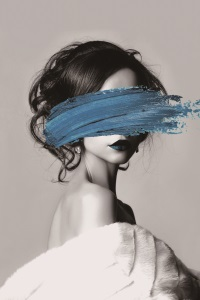

./images\E人物\CE-01-001 (1).jpg


In [13]:
from IPython.display import Image, display
display(Image(img_paths[similar_image_indices[0]],height=30))
print(img_paths[similar_image_indices[0]])